In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [2]:
feats = pd.read_csv("../System/feats_train.csv")
fakes = pd.read_csv("../System/fake_news_feats_train.csv")
feats.head(3)

,index,superlatives,degree_adverbs,comparative_adverbs,proper_nouns,dates,numbers,fp_pronouns,negations,pos_emotion,...,ap_num,ap_date,ap_title,alliteration,profanity,lexical_diversity,lexical_density,function_words,spelling_errors,class
0,1,0.002488,0.200000,0.133333,0.224000,0.000000,0.012438,0.230769,0.000000,0.009950,...,1.0,0.0,1.0,0.000000,0.000000,0.613692,0.589242,0.410758,0.029340,1
1,2,0.000000,0.047619,0.047619,0.170940,0.000000,0.000000,0.545455,0.010471,0.002618,...,1.0,0.0,1.0,0.166667,0.002577,0.590206,0.597938,0.402062,0.064433,1
2,3,0.004255,0.111111,0.000000,0.163934,0.017021,0.008511,0.125000,0.017021,0.017021,...,1.0,0.0,1.0,0.000000,0.000000,0.566667,0.575000,0.425000,0.016667,1


Separate the two classes.

In [3]:
af = feats.loc[feats['class'] == 1]
naf = feats.loc[feats['class'] == 0]

fak = fakes.loc[fakes['class'] == 1]
gen = fakes.loc[fakes['class'] == 0]

In [4]:
af.describe()

,index,superlatives,degree_adverbs,comparative_adverbs,proper_nouns,dates,numbers,fp_pronouns,negations,pos_emotion,...,ap_num,ap_date,ap_title,alliteration,profanity,lexical_diversity,lexical_density,function_words,spelling_errors,class
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,...,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.0
mean,260.000000,0.002809,0.100407,0.049551,0.158417,0.002310,0.017111,0.278652,0.005393,0.005452,...,0.647399,0.552987,0.789981,0.046831,0.000475,0.586304,0.577738,0.422262,0.038681,1.0
std,149.966663,0.003387,0.086903,0.064944,0.082660,0.004378,0.013706,0.209031,0.005088,0.006013,...,0.478241,0.497664,0.407715,0.094759,0.001734,0.078402,0.040904,0.040904,0.027409,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339369,0.463557,0.211982,0.000000,1.0
25%,130.500000,0.000000,0.030331,0.000000,0.094591,0.000000,0.007884,0.118824,0.000379,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.534839,0.551481,0.399886,0.020331,1.0
50%,260.000000,0.001949,0.090909,0.029412,0.148936,0.000000,0.014388,0.272727,0.004573,0.004115,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.590206,0.577849,0.422151,0.034325,1.0
75%,389.500000,0.004367,0.142857,0.083333,0.212768,0.003472,0.021739,0.416667,0.007884,0.007813,...,1.000000,1.000000,1.000000,0.083333,0.000000,0.636603,0.600114,0.448519,0.051392,1.0
max,519.000000,0.019663,0.500000,0.500000,0.490196,0.046729,0.107143,1.000000,0.034483,0.042017,...,1.000000,1.000000,1.000000,0.666667,0.015094,0.818182,0.788018,0.536443,0.238095,1.0


In [5]:
naf.describe()

,index,superlatives,degree_adverbs,comparative_adverbs,proper_nouns,dates,numbers,fp_pronouns,negations,pos_emotion,...,ap_num,ap_date,ap_title,alliteration,profanity,lexical_diversity,lexical_density,function_words,spelling_errors,class
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,...,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.0
mean,779.000000,0.003337,0.128045,0.063887,0.172717,0.003405,0.021586,0.199556,0.005479,0.003932,...,0.593449,0.687861,0.843931,0.060197,0.000403,0.531792,0.579939,0.420061,0.034446,0.0
std,149.966663,0.004277,0.107320,0.078029,0.082476,0.004867,0.014020,0.197031,0.004717,0.004781,...,0.491664,0.463813,0.363271,0.097767,0.001890,0.083224,0.041956,0.041956,0.024678,0.0
min,520.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.227764,0.451477,0.256410,0.000000,0.0
25%,649.500000,0.000000,0.060662,0.000000,0.115383,0.000000,0.011584,0.033712,0.001424,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.477168,0.551020,0.394033,0.016880,0.0
50%,779.000000,0.002183,0.115385,0.050955,0.164103,0.001594,0.018924,0.148148,0.004944,0.002674,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.527187,0.577181,0.422819,0.028455,0.0
75%,908.500000,0.004847,0.175192,0.096006,0.220000,0.004790,0.028436,0.302174,0.008345,0.005597,...,1.000000,1.000000,1.000000,0.121324,0.000000,0.588142,0.605967,0.448980,0.047048,0.0
max,1038.000000,0.035398,1.000000,1.000000,0.578947,0.043257,0.111111,1.000000,0.021277,0.030691,...,1.000000,1.000000,1.000000,0.500000,0.028571,0.759690,0.743590,0.548523,0.165625,0.0


In [6]:
def plot_feature_density(feat_name, AF=af, NAF=naf):
    feat = feats.loc[:, feat_name]
    af_feat = AF.loc[:, feat_name]
    naf_feat = NAF.loc[:, feat_name]
    
    fig, ax = plt.subplots()
    af_feat.plot.density(label='AF', ax=ax, figsize=(10,5), color='aqua')
    naf_feat.plot.density(label='NAF', ax=ax, color='coral')
    plt.legend()
    ax.set_xlabel(feat_name)
    plt.show()

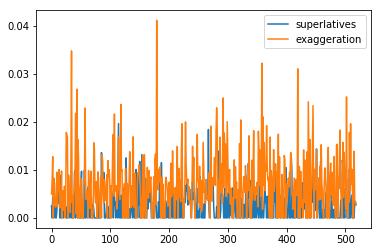

In [7]:
af.loc[:, ['superlatives', 'exaggeration']].plot()

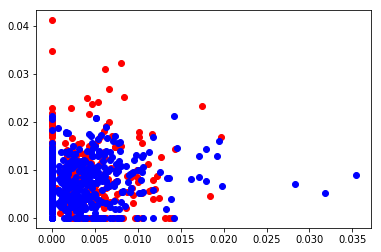

In [8]:
plt.plot(af.superlatives, af.exaggeration, 'ro')
plt.plot(naf.superlatives, naf.exaggeration, 'bo')
plt.show()

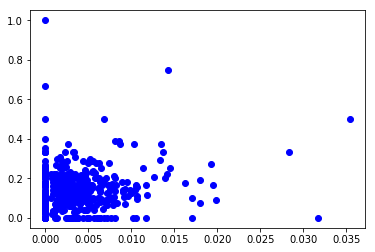

In [9]:
plt.plot(naf.superlatives, naf.degree_adverbs, 'bo')
plt.show()

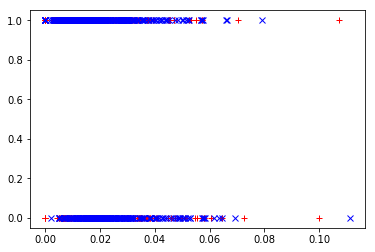

In [10]:
plt.plot(af.numbers, af.ap_num, 'r+')
plt.plot(naf.numbers, naf.ap_num, 'bx')
plt.show()

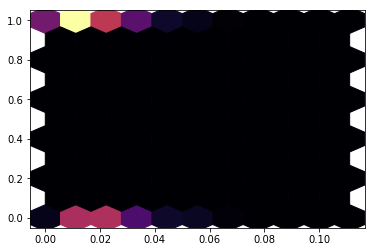

In [11]:
plt.hexbin(feats.numbers, feats.ap_num, gridsize=10, cmap='inferno')
plt.show()

In [12]:
def ANOVA(feature, FEATS=feats):
    #Create a boxplot
    FEATS.boxplot(feature, by='class', figsize=(12, 8))

    grps = pd.unique(FEATS['class'].values)
    d_data = {grp:FEATS[feature][FEATS['class'] == grp] for grp in grps}

    k = len(pd.unique(FEATS['class']))  # number of conditions
    N = len(FEATS.values)  # conditions times participants
    n = FEATS.groupby('class').size()[0] #Participants in each condition
    F, p = stats.f_oneway(d_data[0], d_data[1])
    return F, p


In [13]:
def box_plot_compare(feature, FEATS1, FEATS2):
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(18,8), sharey=True)
    #Create a boxplot
    FEATS1.boxplot(feature, by='class', ax=ax1)
    FEATS2.boxplot(feature, by='class', ax=ax2)
    
    ax1.set_xticklabels(["Real", "AF"])
    ax2.set_xticklabels(["Real", "Fake"])
    plt.show()

def feature_density_compare(feat_name):
    af_feat = af.loc[:, feat_name]
    naf_feat = naf.loc[:, feat_name]
    
    fake_feat = fak.loc[:, feat_name]
    real_feat = gen.loc[:, feat_name]
    
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(18, 8), sharey=True, sharex=True)
    
    af_feat.plot.density(label='AF', ax=ax1, color='aqua', linewidth=5)
    naf_feat.plot.density(label='NAF', ax=ax1, color='coral', linestyle='--', linewidth=5)
    ax1.set_xlabel(feat_name, fontsize=16)
    ax1.tick_params(labelsize=16)
    
    fake_feat.plot.density(label='Fake', ax=ax2, color='aqua', linewidth=5)
    real_feat.plot.density(label='Real', ax=ax2, color='coral', linestyle='--', linewidth=5)
    plt.legend()
    ax2.set_xlabel(feat_name, fontsize=16)
    ax2.tick_params(labelsize=16)
    
    ax1.set_ylabel('Density', fontsize=16)
    
#     ax1.set_xticklabels([])
#     ax2.set_xticklabels([])
    
    plt.show()
    return fig

In [14]:
def shaded_density_plot(feat_name):
    af_feat = af.loc[:, feat_name]
    naf_feat = naf.loc[:, feat_name]
    
    fake_feat = fak.loc[:, feat_name]
    real_feat = gen.loc[:, feat_name]
    
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(18, 8), sharey=True, sharex=True)
    
    sns.distplot(af_feat, hist=False, kde=True, label='April Fool', ax=ax1,
                 kde_kws={'linewidth': 4, 'shade': True})
    sns.distplot(naf_feat, hist=False, kde=True, label='Genuine', ax=ax1,
                 kde_kws={'linewidth': 4, 'shade': True, 'linestyle': '--'})
#     ax1.set_xlabel(feat_name, fontsize=25)
#     ax1.set_xlabel("")
    ax1.xaxis.label.set_visible(False)
    ax1.tick_params(labelsize=25)
    
    sns.distplot(fake_feat, hist=False, kde=True, label='Fake', ax=ax2,
                 kde_kws={'linewidth': 4, 'shade': True})
    sns.distplot(real_feat, hist=False, kde=True, label='Genuine', ax=ax2,
                 kde_kws={'linewidth': 4, 'shade': True, 'linestyle': '--'})
#     ax2.set_xlabel(feat_name, fontsize=25)
#     ax2.set_xlabel("")
    ax2.xaxis.label.set_visible(False)
    ax2.tick_params(labelsize=25)
    
    ax1.legend(prop={'size': 25})
    ax2.legend(prop={'size': 25})
    
#     ax1.set_ylabel('Density', fontsize=25)
    
    plt.show()
    return fig


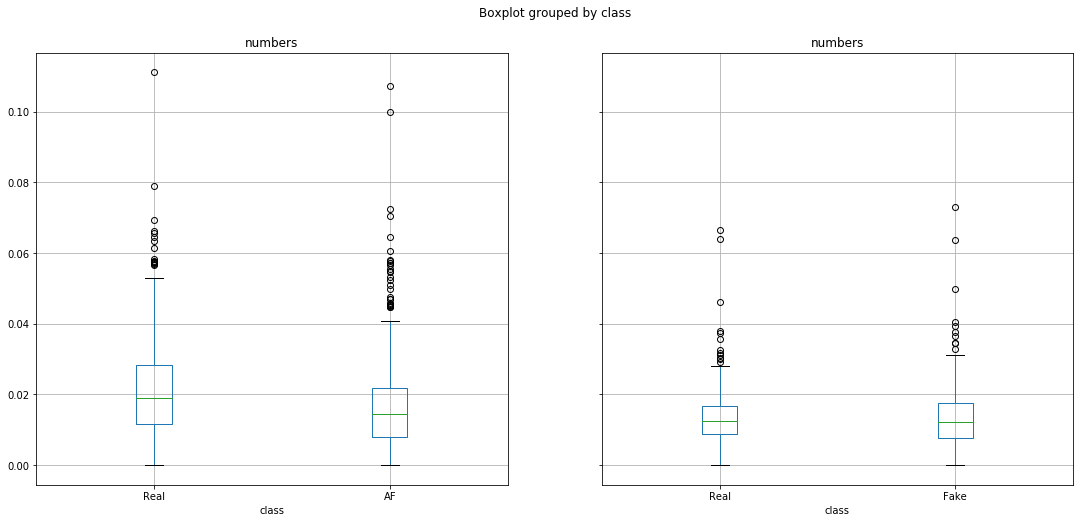

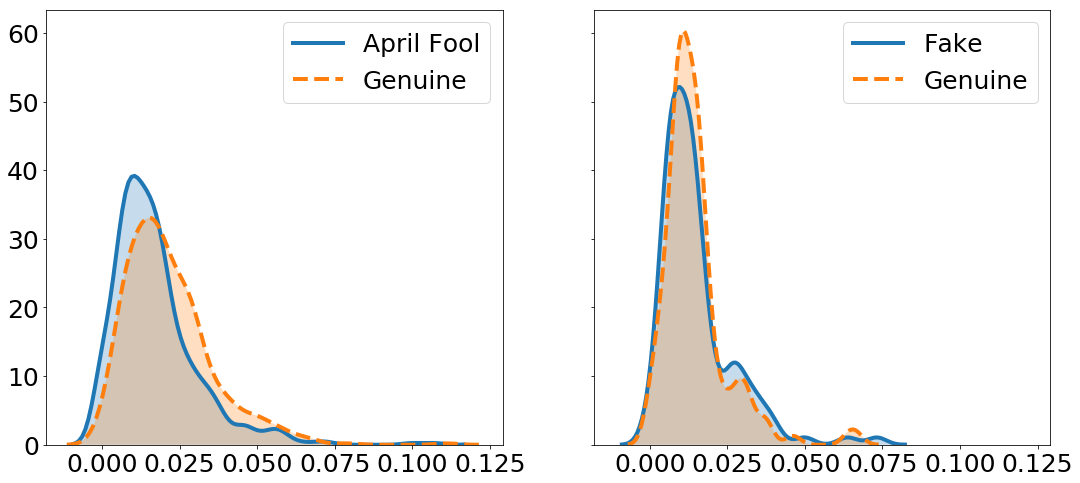

In [18]:
feature = 'numbers'
box_plot_compare(feature, feats, fakes)
fig = shaded_density_plot(feature)
fig.savefig("graphs/{}_density.pdf".format(feature), bbox_inches='tight')

0.00014730716567195424


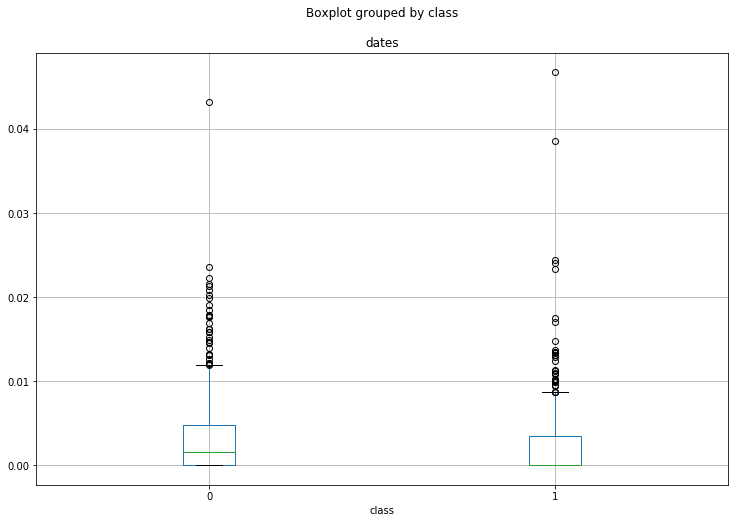

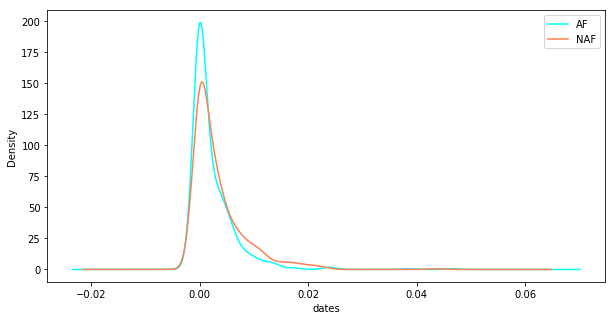

3.941027703166972e-05


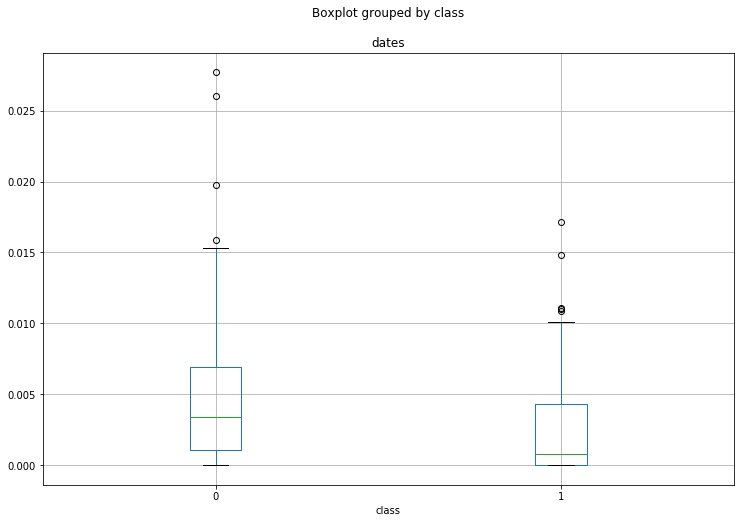

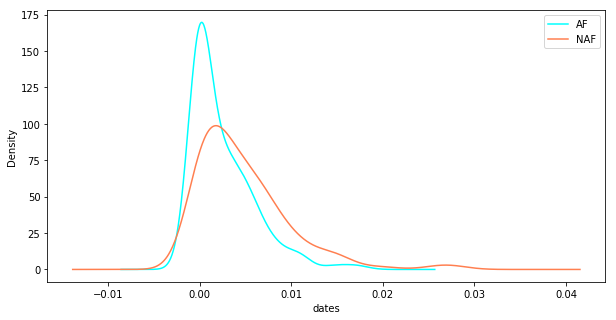

In [16]:
feature = 'dates'
F, p = ANOVA(feature)
print(p)
plot_feature_density(feature)

F, p = ANOVA(feature, fakes)
print(p)
plot_feature_density(feature, AF=fak, NAF=gen)

KeyError: 'the label [quote_proportion] is not in the [columns]'

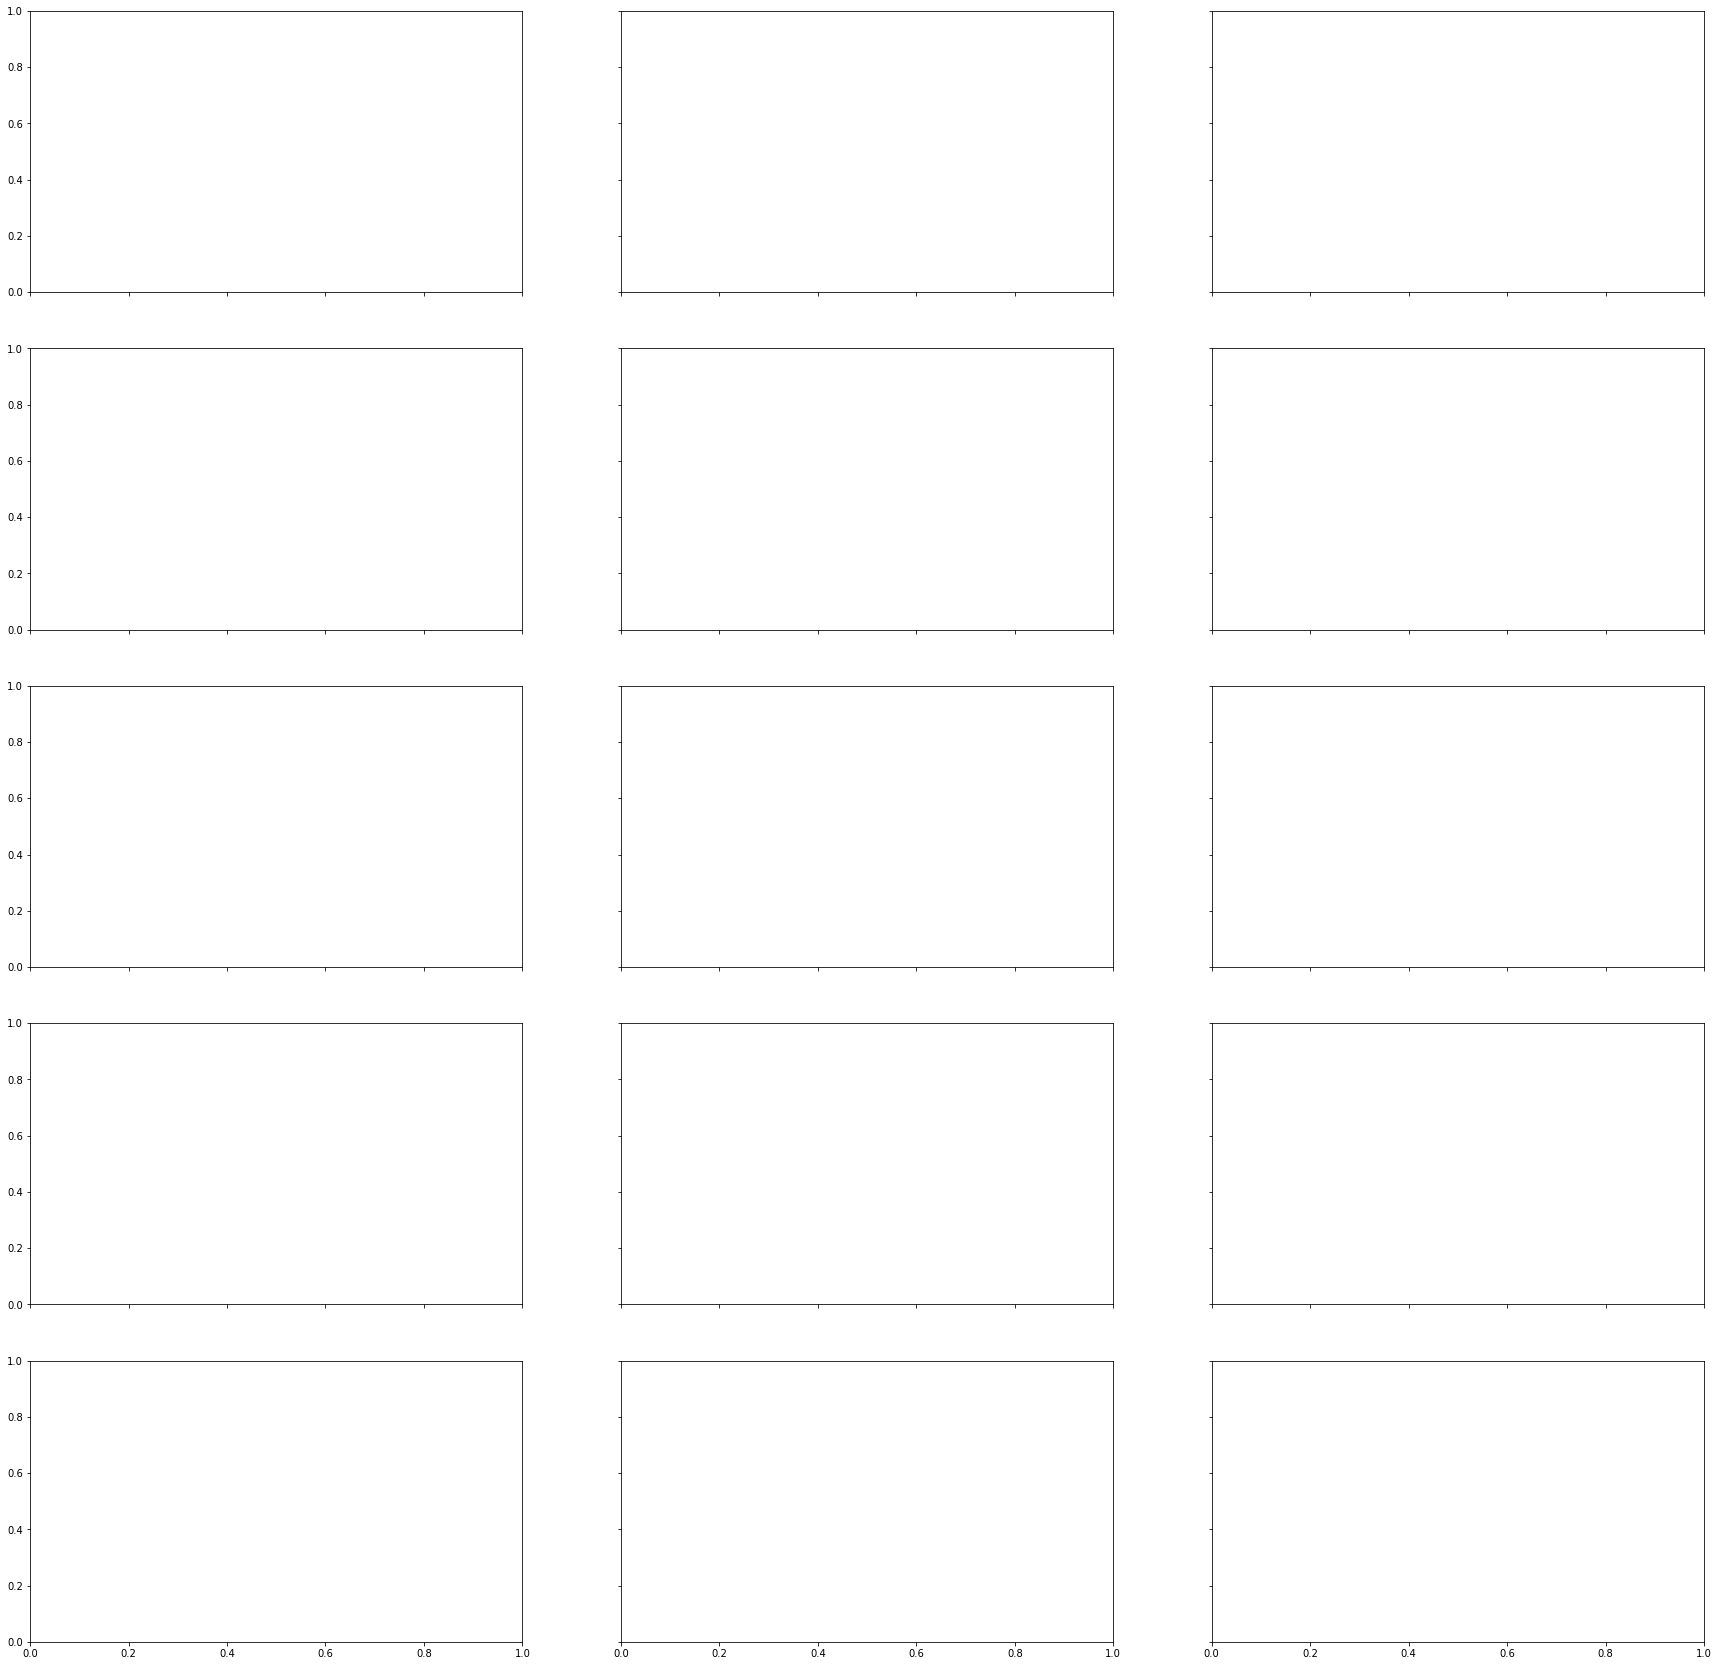

In [17]:
f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14, ax15)) = plt.subplots(5, 3, sharex=True, sharey=True, figsize=(30, 30))

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15]

features = []
with open('../System/feature_sets/complexity.txt') as file:
    for line in file:
        features.append(line.strip())
        
with open('../System/feature_sets/details.txt') as file:
    for line in file:
        features.append(line.strip())
        
for feat_name, ax in zip(features, axes):
    af_feat = af.loc[:, feat_name]
    naf_feat = naf.loc[:, feat_name]

    af_feat.plot.density(label='AF', ax=ax, color='aqua', title=feat_name)
    naf_feat.plot.density(label='NAF', ax=ax, color='coral', title=feat_name)
    
plt.show()


In [ ]:
f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14, ax15)) = plt.subplots(5, 3, sharex='col', sharey='row', figsize=(30, 30))

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15]

features = []
with open('../System/feature_sets/complexity.txt') as file:
    for line in file:
        features.append(line.strip())
        
with open('../System/feature_sets/details.txt') as file:
    for line in file:
        features.append(line.strip())
        
for feat_name, ax in zip(features, axes):
    af_feat = af.loc[:, feat_name]
    naf_feat = naf.loc[:, feat_name]

    feats.boxplot(feat_name, by='class', ax=ax)
    
plt.show()